## Training Lienar Model
이전 Post에서는 단순하게 Sklearn에서 Model들을 가지고 Fitting을 하였다.  
이번 Post에서는 단순하게 Model만 가지고 Fitting하는 것이 아닌 다양한 학습 방법및 원하는 방식으로 Parameter조절, 또 Model의 성능을 향상시키기 위한 방법에 대해서 알아본다.

## Setup
실제 Project를 진행하기 앞서 사용하고자 하는 Library확인 및 원하는 Version(Python 언어 특성상 Version에 많이 의존하게 된다.)이 설치되어있는지 확인하는 작업이다.  
또한, 자주 사용하게 될 Function이나, Directory를 지정하기도 한다.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression
선형 회귀를 해결하는 방법으로는 <a href="https://wjddyd66.github.io/dl/NeuralNetwork-(3)-Optimazation/">NormalEquation과 SGD와 같이 Optimizer를 활용하여 Function Approximation을 하는 방법</a>이 있다. (자세한 내용은 이번 Post를 벗어나므로 링크 참조)  
아래 Code는 <span>$y=4+3*X+GausianNoise$</span>의 Data를 생성하고 확인하는 과정이다.
- <code>np.random.rand(m,n)</code>: m,n 크기의 0~1 표준정규 분포
- <code>np.random.randn(100,1)</code>: m,n 크기의 평균0, 분산1의 가우시안 표준정규 분포

Saving figure generated_data_plot


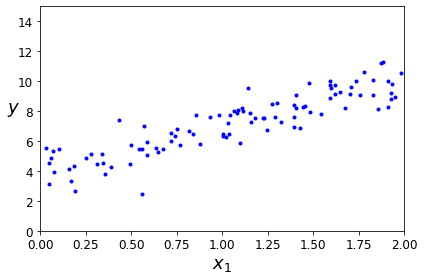

In [3]:
# Create Data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Data Visualization
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### Normal Equation

위에서 우리는 식 <span>$y=4+3*X+GausianNoise$</span>으로서 Dataset을 구축하였다.  

우리는 이러한 실제 Function을 알 수 없고 주어진 X,Y의 Data로서 위의 Function을 예측하여야 한다.  
먼저 우리는 **Model이 Linear Regression형태라고 가정한다면 다음과 같이 식을 쓸 수 있다.**  
<p>$$y = \theta_0+\theta_1*x$$</p>

위의 식에서 우리는 **Normal Equation을 사용**하게 되면 최적의 Parameter <span>$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$</span>라는 것을 알 수 있다. (위의 식이 이해 되지 않으시면 위의 링크를 참조)  

따라서 <span>$\theta_0 = \theta_0*X_0 -> X_0=1$</span>이 되게 되고 이러한 상태에서 NormalEquation을 통해 <span>$\hat{\theta}$</span>를 구하여 나타내면 다음과 같다.

Paramter
𝜃0 = [3.86501051], 𝜃1 = [3.13916179]

Model Prediction
 [[ 3.86501051]
 [10.14333409]] 

Saving figure linear_model_predictions_plot


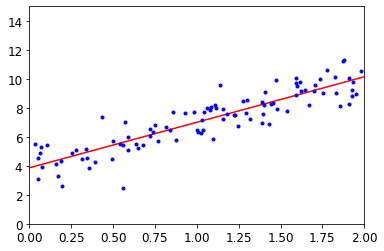

In [18]:
# X_0 + X_1
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('Paramter\n𝜃0 = {}, 𝜃1 = {}'.format(theta_best[0],theta_best[1]))

# Prediction
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
# X =0, 2 -> y=?, 
y_pred = X_new_b.dot(theta_best)
print('\nModel Prediction\n',y_pred,'\n')

# Visualization
save_fig("linear_model_predictions_plot")
plt.plot(X_new, y_pred, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

위의 과정은 sklearn의 Model을 사용하여 구축하면 다음과 같다.

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print('Paramter\n𝜃0 = {}, 𝜃1 = {}'.format(lin_reg.intercept_, lin_reg.coef_))

Paramter
𝜃0 = [3.86501051], 𝜃1 = [[3.13916179]]


위의 식을 조금만 더 생각해보자.  
위에서 Normal Equation의 결과로 우리는 다음과 같은 식을 얻었다.  
<p>$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$</p>
위의 식을 다음과 같이 변형할 수 있다.  
<p>$$(X^{T}X)^{-1}X^{T}y = X^{-1}(X^{T})^{-1}X^{T}y$$</p>
<p>$$X^{-1}y = X^{+}y$$</p>
<p>$$(X^{+}\text{  :pseudo inverse})$$</p>

In [20]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])